In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
lang=pd.read_csv("处理后技术数据\langs.csv")
lang.dropna(axis=0,subset=["LanguageWorkedWith"],inplace=True)
lang=lang.iloc[:,2:]
lang=lang.sample(n=10000,random_state=123,axis=0)
lang

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
35501,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8036,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21425,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
46705,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34967,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23052,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
30218,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
45924,0,0,0,0,0,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,0
54823,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import re
from sklearn.manifold import TSNE
from scipy.cluster.vq import vq, kmeans, whiten

features=lang
# 白化处理
whitened = whiten(features)

100%|██████████| 18/18 [00:05<00:00,  3.17it/s]


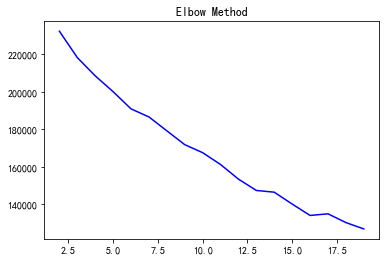

In [5]:
# 肘部法则的可视化
from sklearn.cluster import KMeans
elbow=[]
X=whitened
for i in tqdm(range(2,20)): # 创建遍历，找到最合适的k值
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
# 通过画图找出最合适的K值
import seaborn as sns
sns.lineplot(range(2,20),elbow,color='blue')
plt.rcParams.update({'figure.figsize':(16,10),'figure.dpi':100})
plt.title('Elbow Method')
plt.show()

In [6]:
import re
from sklearn.manifold import TSNE
from scipy.cluster.vq import vq, kmeans, whiten

#k-means聚类
codebook, distortion = kmeans(whitened, 5)# 返回聚类中心点和每个类的平均误差
#返回每行数据聚类的编号及偏差
codes, error = vq(whitened, codebook)
#将聚类结果形成dataframe
df=pd.DataFrame(features)
df['code']=codes

  0%|          | 0/10000 [00:00<?, ?it/s]

            0          1
0   -9.175734  52.222633
1   -8.477931 -44.516354
2    6.814333  39.001602
3  -18.466406 -29.821587
4  -24.828218 -69.268852
5  -45.508812  24.760986
6  -23.747091 -48.632702
7   -8.945699 -45.206989
8   48.113441  25.216665
9   62.497711  21.653767
10 -16.633034  40.093136
11  14.615669  -9.357554
12   7.459816 -41.757946
13  31.615499 -42.980305
14 -70.016518 -13.815038
15 -27.202446 -11.372810
16 -70.906906   2.204196
17  53.640076  40.779076
18 -26.842693  -9.230955
19 -37.713207   9.580647


100%|██████████| 10000/10000 [01:46<00:00, 94.23it/s]


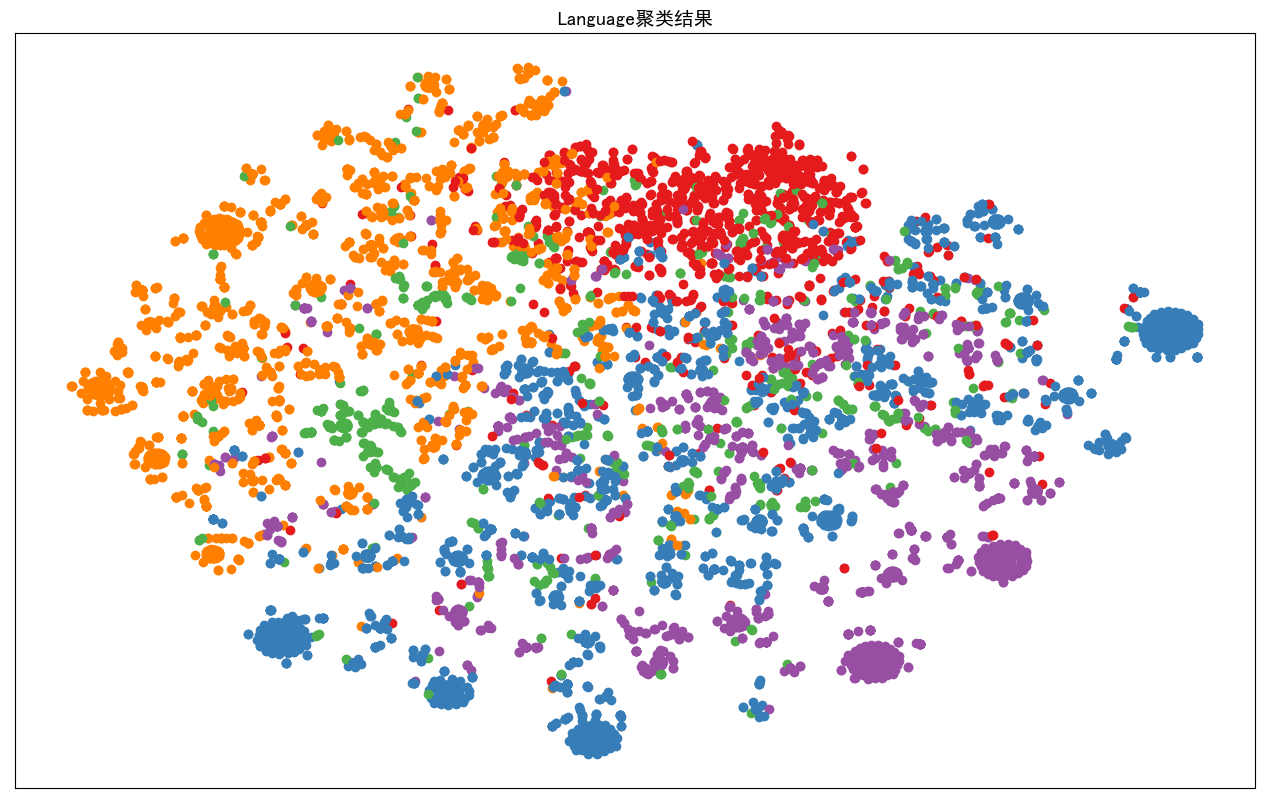

In [8]:
df=df.reset_index(drop=True)
def plot_embedding(images, label):
    x_min, x_max = np.min(images, 0), np.max(images, 0)
    images = (images - x_min) / (x_max - x_min)   # 归一化处理
    fig = plt.figure()  # 建图
    for i in tqdm(range(len(images))):  # 遍历所有样本
        plt.scatter(images[i, 0], images[i, 1],c= np.array(plt.cm.Set1(label[i])).reshape(1,-1))
    plt.xticks([])
    plt.yticks([])
    plt.title("Language聚类结果", fontsize = 14)  # 标题
    plt.show()

# 降为二维后实现可视化
def Paint(images, labels):
    tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)  # 利用TSNE降维
    result = tsne.fit_transform(images)
    print(pd.DataFrame(result).head(20))
    # 画图
    plot_embedding(result, labels)
    
Paint(df.iloc[:,:-1],df["code"])